# Assignment 3: Clustering using decision trees and logistic regression



**Objective**: In this assignment we will classification models using sklearn. Next, we will apply regularization to avoid under- and over-fitting. 


Please do not share this material on any platform or by any other means.

Important Notes:

    Make changes to the cells that have # YOUR CODE HERE or # YOUR COMMENT HERE.Do not write your answer in anywhere else other than where it says YOUR CODE HERE (or YOUR COMMENT HERE).

    Your code must run without any errors start to end. Please go to menubar, select Kernel, and restart the kernel and run all cells (Restart & Run all) before submitting your work.

    Purpose of the assignment is to assess your knowledge and command of the data mining algorithms, python programming language, and your ability to resolve common errors. Grading is based on the code and your interpretation/comments you are submitting, not the formatting of the results.

    Please use the examples as a guideline, you are not expected to have the same formatting as the example, unless it is a formatting question.

Remember, there are many ways to code that can lead to the correct answer, do not hesitate to exercise your own style and python programming coventions.

## BioText Monitor: Text-Based Wildlife Classification for Ecosystem Research

BioText Monitor is a cutting-edge initiative aimed at enhancing wildlife research and conservation efforts through advanced text data analysis. Developed by a team of ecologists, data scientists, and conservationists, this project leverages text-based data to classify animals into broad categories for further ecological study and conservation planning.

The diverse and complex nature of ecosystems poses a significant challenge in accurately identifying and classifying a vast range of animal species. Traditional methods rely heavily on visual or audio data, which can be limited by environmental conditions and the presence of rare species. Text-based data, such as field notes, research reports, and local sightings, provide an additional, rich source of information that is often underutilized.

An NLP model developed by another team created datasets that you will use to build a model to classify animals as mammal or no. This model then will be a preliminary step in a larger AI model in a comprehensive ecological study. 

Let's get started!

Classification is the task of predicting a nominal-valued class labels (dependent variable) based on the values of other attributes (independent or predictor variables).

Our dataset consists of 7 predictor variables, and a target class. We will be using this dataset to classify whether an observation is a mamal or not. Let's import our dataset and observe the features. 

In [14]:
import pandas as pd
df = pd.read_csv('mamalOrNot_TrainingData.csv',header='infer')

#### Understanding the dataset

In [15]:
df.head()

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals


In [16]:
df.Class.unique()

array(['mammals', 'non-mammals'], dtype=object)

In [17]:
df.shape

(15, 8)

Our dataset has 8 features in total, 7 independent (Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates) and 1 dependent feature (Class). Class has two options, mamals and non-mamals. We have 15 observations in our dataset. Let's read in our test dataset as well. 

In [18]:
df_test = pd.read_csv('mamalOrNot_TestData.csv',header='infer')
df_test.head()

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monster,0,0,0,0,1,1,non-mammals
1,platypus,1,0,0,0,1,1,mammals
2,owl,1,0,0,1,1,0,non-mammals
3,dolphin,1,1,1,0,0,0,mammals


In [19]:
df_test.shape

(4, 8)

Our test data also has 8 features, and it consists of 4 observations. 

Let's look at the relationship between "Warm-blooded" and "Gives Birth", can these attributes help us solve our classification problem?

In [ ]:
pd.crosstab([df['Warm-blooded'],df['Gives Birth']],df['Class'])

The result shows the "Warm-blooded" and "Gives Birth" features are able to distinctly classify the mamals and non-mamals into different classes. 


Let's use a decision classifier and interpret the results.

## Q1: Create an instance of Decision Tree Classifier, set max_depth = 1.

Fill in the below code, and fit the dataset to the model. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

y_train = df["Class"]
x_train = df.drop(['Name','Class'],axis=1)

clf = DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth= 1)
clf.fit(x_train, y_train)

#### What are the parameters of our clf object?

In [ ]:
clf.__init__

### Plotting decision trees

An advantage of decision trees is that we can use a decision tree plot to visualize the rules developed by the tree. If you don't already have graphviz and pydotplus, please download using "pip install" with library name (more about these libraries at http://www.graphviz.org and http://pydotplus.readthedocs.io/)

In [ ]:
import pydotplus 
from IPython.display import Image
from sklearn import tree
dot_data = tree.export_graphviz(clf, feature_names=x_train.columns
                , class_names=['mammals','non-mammals'],filled=True) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

## Q2: Create an instance of Decision Tree Classifier, with max_depth=3. 

Discuss the results, what is different about the decision tree, and why?

In [12]:
clf_depth3 = DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth= 3)
clf_depth3.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

Depth of the trees:
* In the first tree, there is only one split based on the feature "Gives Birth <= 0.5". This means the tree only considers whether an animal gives birth or not to classify it as a mammal or non-mammal.
* The second tree is deeper and includes an additional split based on the feature "Warm-blooded <= 0.5" within the 'False' branch of the first split. This means that for animals that do not give birth, the tree further classifies them based on whether they are warm-blooded or not.

Entropy: 
* In the first tree, the 'False' branch after the first split has an entropy of 0.65, indicating some impurity. In the second tree, this branch is further split by the "Warm-blooded" feature, creating two new branches, each with an entropy of 0, indicating that they are perfectly pure.

Samples and Values:
* In the first tree, the 'False' branch shows that there are 6 samples, 5 of which are mammals and 1 non-mammal, leading to the entropy of 0.65.
* In the second tree, the 'False' branch is further split into two nodes: one with 1 non-mammal (warm-blooded but doesn't give birth) and another with 5 mammals (doesn't give birth and isn't warm-blooded).

Classification Accuracy and Overfitting:
* The first tree is a very simple model and might be too generalized; it may not perform well if the data has more complex patterns.
* The second tree is more complex and may fit the training data better, but there is a risk of overfitting, where the model is too tailored to the training data and may not generalize well to unseen data.

Decision Rules: 
* The first tree only uses one rule: if an animal does not give birth, it's classified as a mammal; otherwise, it's a non-mammal.
* The second tree uses two rules: if an animal does not give birth, it's further checked if it's warm-blooded to decide if it's a mammal or non-mammal.

## Q3: Create a new decision tree plot of your model in Q2.2


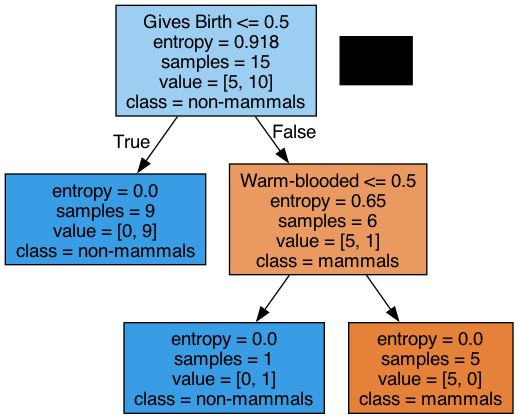

In [13]:
dot_data = tree.export_graphviz(clf_depth3, feature_names=x_train.columns
                , class_names=['mammals','non-mammals'],filled=True) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

## Q4: Test the decision tree performance on the test set. Use the model from Q2. 

Discuss the results.

In [20]:
y_test = df_test["Class"]
x_test = df_test.drop(['Name','Class'],axis=1)

y_pred = clf_depth3.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[1 1]
 [0 2]]


The confusion represents the performance of the model testing on the test data. The top-left is TN, top-right is FP, bottom-left is FN, and bottom-right is TP, where the positive represents "mammals" class and negative represents "non-mammals" class.
<br>
The model has an accuracy of 75%. This means it correctly predicts 75% of the instances, whether they are mammals or non-mammals. The recall for the "mammals" class is 100%, which means the model is excellent at identifying all mammal instances without missing any. The precision for the "mammals" class is 67%, which indicates that when the model predicts an instance as a mammal, it is correct 67% of the time.
<br>
The model demonstrates strong capability in identifying mammals (high recall) but has room for improvement in distinguishing non-mammals from mammals, as evidenced by the false positive rate. However, the data size either for training or for testing is small. Thus, we need more data to check model performance.

## HealthScan AI: Enhancing Breast Cancer Diagnosis Accuracy

HealthScan AI is an innovative project undertaken by a consortium of medical researchers, data scientists, and healthcare providers. The project's aim is to develop an advanced machine learning model to improve the accuracy of breast cancer diagnosis, specifically in classifying tumors as benign or malignant. This initiative is particularly crucial in early-stage cancer detection, where accurate diagnosis can significantly impact treatment outcomes and patient survival rates.

Breast cancer diagnosis often relies on mammograms, biopsies, and medical imaging, which sometimes yield ambiguous or inconclusive results. The challenge lies in reducing false positives and negatives, as misclassification can lead to either unnecessary treatments or delayed intervention, respectively.

You are tasked with building predictive model that uses data from the Breast Cancer Dataset, a well-known dataset in medical data analysis. This dataset includes features such as tumor size, shape, and cell characteristics, derived from fine-needle aspirate (FNA) of breast mass. The model aims to classify these tumors as benign or malignant with high accuracy.

You identified that this problem is a classification problem, and researched your options. Decision tree classifiers are only one of the many techniques we can use. Linear classifiers such as logistic regression and support vector machine (SVM) constructs a linear separating hyperplane to distinguish instances from different classes. Using the following questions as a guide post, let's get started by reading the dataset! 

In [25]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [26]:
pd.Series(cancer.target).value_counts()

1    357
0    212
dtype: int64

## Q5: Create the independent and dependent datasets, also divide the dataset into train and test.

Use random state = 42. Is there a benefit to using ```stratify``` parameter?

In [28]:
from sklearn.model_selection import train_test_split

X = cancer.data
y = cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

The stratify parameter ensures that the train-test split represents the original dataset's distribution of the target variable. This is particularly important for datasets with imbalanced classes in terms of we have 357 VS 212. It ensures that both the training and testing sets have a similar proportion of each class as found in the original dataset. This leads to more reliable evaluation metrics, as the test set will more accurately reflect the performance of the model on unseen data.

## Q6: Train a Logistic Regression model, find the scores of the training and test datasets. Interpret the results.

Caution, when training and test set performances are very close, it is likely we are underfitting. Is your model under- or over-fitting, why?

In [31]:
from sklearn.linear_model import LogisticRegression
# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)

# Find the scores of the training and test datasets
train_score = log_reg.score(X_train, y_train)
test_score = log_reg.score(X_test, y_test)

train_score, test_score

(0.9560439560439561, 0.9649122807017544)

Noticed that the accuracy on the training set is slightly lower than the accuracy on the test set, and both scores are high, it suggests that the model is well-fitted. It's neither underfitting nor overfitting. 

## Can regularization improve our metrics? Using Ridge and Lasso

Most of the time there is discrepancy between performance on the training set and the test set, which may be an indication of under- or over-fitting. When suspected, Ridge and Lasso Regression models are used. 

Ridge regression formula makes predictions the same way as ordinary least squares (linear regression). However in Ridge regression there is a penalty term employed to avoid overfitting, as a result it produces a more restricted model. When Ridge training set score is less than the Linear Regression model training set score, and Ridge test set score is higher than the Linear Regression model test set score, we can conclude that Linear Model is overfitting. If this is the case, you should proceed with Ridge model since it generalizes better (based on the higher test score).

Ridge balances model simplicity and training score (The simpler the model, the smaller the training score would be) using parameter ```alpha```. Higher ```alpha``` values result in smaller coefficients. You can test multiple ```alpha``` values in your analysis. In sklearn implementation you will see the parameter ```C```, which is ```1/alpha```.

Lasso also has a penalty term, and some features are entirely ignored by the model by setting coefficients of those features to 0. This is helpful in identifying which features are important , and with any reduction in feature size, the model also may become more interpretable.

## Q7: By varying the regularization coefficient C (1/alpha), find the best model (test both the training and test datasets)
Higher values of C results in more flexible models. 

In [ ]:
# YOUR CODE HERE
C = [0.01, 1, 10, 100]




If you stored the accuracy scores in trainAcc and testAcc for training scores and test scores for varying C levels, you may have a plot like this:

In [ ]:
plt.plot(C,trainAcc)
plt.plot(C,testAcc)
for param in C:
    plt.axvline(x=param, ymin=0, ymax=1, linestyle='dashed')

The default value C=1 provides a good performance with 95% accuracy on both the training and the test dataset. But as training and test set performance are very close, we can suspect the model may be underfitting. With the last question, we tested multiple C values, by increasing the value of C we enabled the model to be more flexible. 

Increasing C=100 has higher training set accuracy, and slightly increased test accuracy as well. The graph shows it is a good idea to increase C to build a more complex model.

By testing C=0.01, the training and test scores are similar, and decreasing the value of C (less flexible model) still underfits the data. 

Let's wrap up with a plot the coefficients of our best model, which shows the feature importance.

In [ ]:
plt.plot(coef[100].T,'o',label='C100')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel('Coefficient Magnitude');
plt.legend()

**Assignment 3 Complete!**